# Heart Attack Dataset Analysis from KaggleHub

In [ ]:
!pip install kagglehub
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp39-cp39-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp39-cp39-win_amd64.whl (1.5 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\harre\.cache\kagglehub\datasets\fatemehmohammadinia\heart-attack-dataset-tarik-a-rashid\versions\1


In [16]:
# Load the CSV file from the downloaded dataset
import os
import pandas as pd

# Find the CSV file in the downloaded path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    csv_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_path)
    print("Loaded CSV file:", csv_path)
    display(df.head())
else:
    print("No CSV file found in the dataset directory.")

Loaded CSV file: C:\Users\harre\.cache\kagglehub\datasets\fatemehmohammadinia\heart-attack-dataset-tarik-a-rashid\versions\1\Medicaldataset.csv


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [17]:
# Simple Random Forest to predict the 'Result' column
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and target
X = df.drop(columns=['Result'])
y = df['Result'].map({'negative': 0, 'positive': 1})  # Encode target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9810606060606061
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



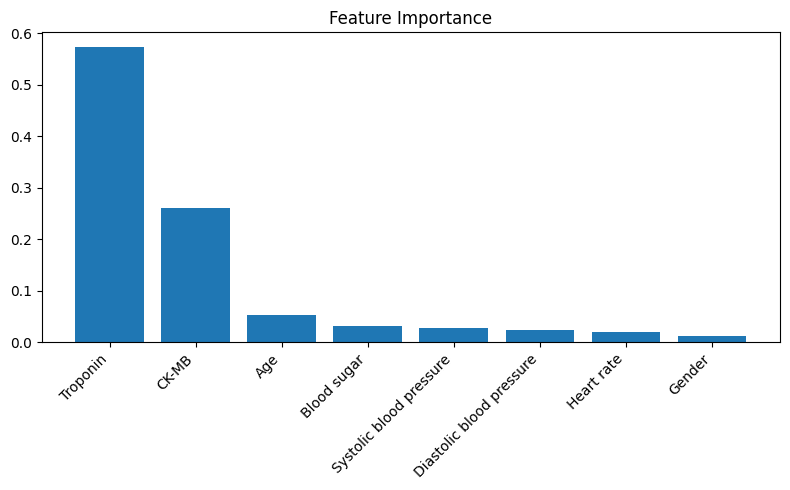

Troponin: 0.5728
CK-MB: 0.2605
Age: 0.0524
Blood sugar: 0.0317
Systolic blood pressure: 0.0280
Diastolic blood pressure: 0.0234
Heart rate: 0.0194
Gender: 0.0120


In [18]:
# Overview of feature importance from the trained Random Forest
import matplotlib.pyplot as plt
import numpy as np

feature_importances = clf.feature_importances_
feature_names = X.columns

# Display as a sorted bar plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importances in descending order
for i in indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

## Interactive Feature Selector

Use the checkboxes below to select which features to include in the model. Then re-run the cell to see the effect on accuracy and feature importance.

In [12]:
!pip install ipywidgets

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)

   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]



We were able to see from the data hat Troponin ist a good indicator for a heartattack this is true as seen by Wikipedia down below.

From Wikipedia, the free encyclopedia
"Troponin"

Blood troponin levels may be used as a diagnostic marker for stroke or other myocardial injury that is ongoing, although the sensitivity of this measurement is low.
